# Introduction: 
### The success of the ARIMA model to a greater extent depends upon the proper selection of the parameters. This is cumbersome. Facebook has created a new library called "fbprophet" which enables the data analysts to perform forecasting with ease.

### Here we will be using the Box and Jenkins (1976) Airline Passengers dataset, which contains time series data on the monthly number of airline passengers between 1949 and 1960. 

### Installation of the fbprophet is tricky. It requires the installation of the following pre-requisites: pandas/ matplotlib/ numpy/ cython/ pystan(Python wrapper to STAN programming language). Of these pandas, numpy, matplotlib and cython are pre-installed in Anaconda. You need to install pystan and fbprophet. 

# Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
import seaborn as sns
sns.set()

# Read the data

In [3]:
df = pd.read_csv('AirPassengers.csv')
print(df.head())
print(df.shape)                                # (144, 2)

# We have 144 rows and exactly 2 columns. One containing the travel date information and another the # of Passengers. 

  TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121
(144, 2)


# Pre-requisites of Prophet:
1. The input DataFrame should contain 2 columns - one containing time information and another column containing the metric that we wish to forecast. 
2. The time column should be of the type "datetime". 
3. Prophet also imposes the strict condition that the input columns be named ds (the time column) and y (the metric column), so let's rename the columns in our DataFrame:

In [4]:
# Check existing column type
print(df.dtypes)

# Convert the column 'TravelDate' to type 'datetime'
df.TravelDate = pd.DatetimeIndex(df.TravelDate)

# Check the column type
print("\n\n", df.dtypes)

TravelDate    object
Passengers     int64
dtype: object


 TravelDate    datetime64[ns]
Passengers             int64
dtype: object


In [5]:
# Change the column names to ds & y. 
df = df.rename(columns={'TravelDate': 'ds',
                        'Passengers': 'y'})
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


# Visualize the time series- 
### Our dates are already streamlined. Its the first day of every month. So we can proceed directly with the plotting.

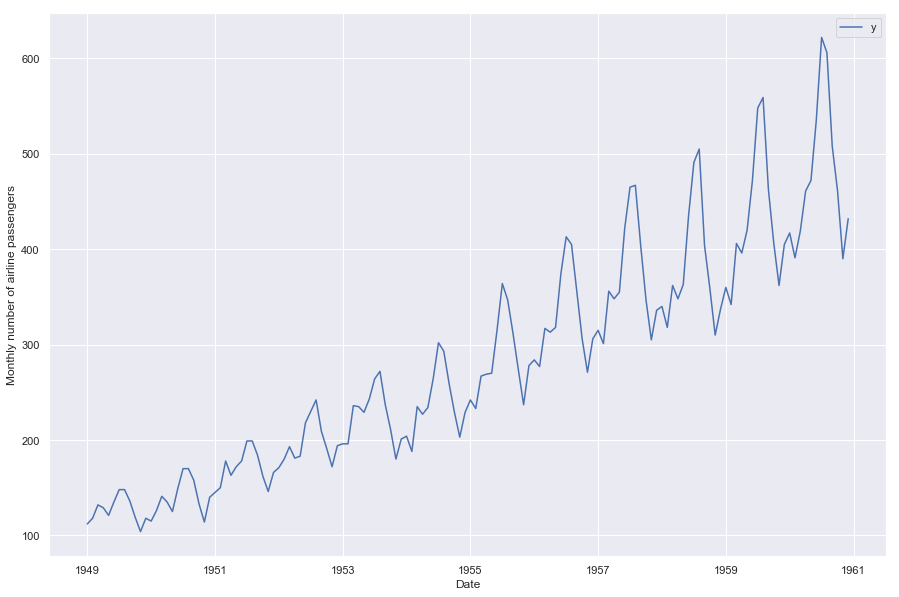

In [6]:
ax = df.set_index('ds').plot(figsize=(15,10))
ax.set_xlabel('Date')
ax.set_ylabel('Monthly number of airline passengers')
plt.show()

# The plot reveals an upward trend aswell as seasonality. 

# Time Series forecasting with Prophet
Prophet as the name suggests is used to predict future values of our time series. The developers of Prophet, have abstracted many of the internal complexities of time series forecasting. 


In [7]:
# Instantiate the Prophet class. 
objModel = Prophet(interval_width = 0.95)                          # Set the uncertainty interval to 95% (the Prophet default is 80%)

# Fit the model on our data
objModel.fit(df)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Make future predictions
In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a ds column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function:

In [8]:
future_dates = objModel.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [30]:
# Inference: In the code chunk above, we instructed Prophet to generate 36 monthly datestamps in the future, as we had specified
# the freq='MS' option. 36 months == 3 years.
# This new dataframe of future dates is used as an input to the predict() of our fitted model. 

In [9]:
forecast = objModel.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()                   # Column names have to be  very very specific...


,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.511816,605.966112,695.226331
176,1963-09-01,601.983199,556.921360,645.077502
177,1963-10-01,565.980192,523.339885,605.401902
178,1963-11-01,534.021253,491.083293,579.209457
179,1963-12-01,563.611828,518.447402,611.750043


In [34]:
# NOTE: In every iteration, values will be a bit different, as Prophet relies on Markov Chain Monte Carlo methods (MCMC) to 
# generate its forecasts. MCMC is a stochastic process, therefore values will be slightly different each time. 


# Plot the results of the forecast
### When working with Jupyter you might encounter a problem of redundant plots. To avoid this put a ';' after the plot command.
### Reference: https://github.com/facebook/prophet/issues/124

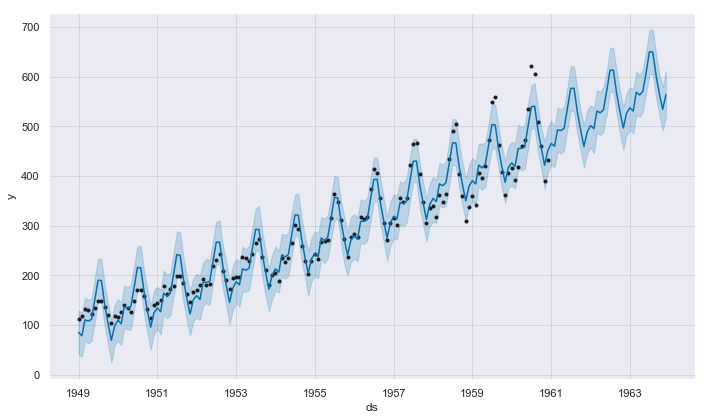

In [10]:
objModel.plot(forecast, uncertainty=True);

In [11]:
# Inference: 
# Here the black dots are the observed time series values (i.e. original values). 
# The blue line is the forecasted value. 
# The blue shaded region is the uncertainty interval/confidence interval (set to 95%. Prophet default: 80%) 


# Plotting forecast components

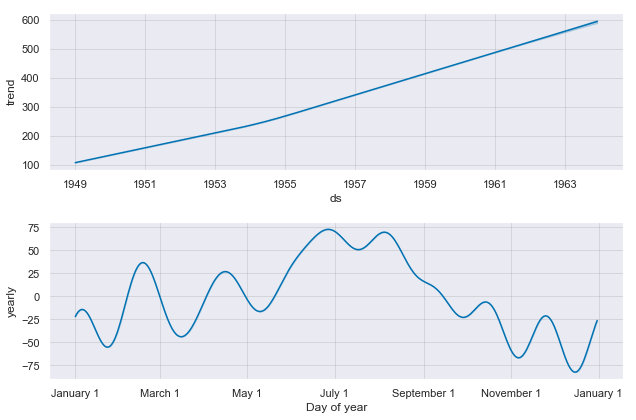

In [40]:
objModel.plot_components(forecast);  


In [ ]:
# Inference:
# 1. Here we observe the yearly and monthly pattern of the time series. 
# 2. The first plot shows that the volume of airline passengers has been increasing steadily over the years. 
# 3. The second plot, reveals that the traffic rush is max during holiday months June - August. 


### Reference: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3